In [ ]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Librerías**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import warnings
warnings.filterwarnings('once')

# **Lectura de Datos**

In [23]:
datos = Table.read('/usr/local/datos/Data/firefly.fits')
datos = datos.to_pandas()
datos.describe()


,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,...,Chabrier_MILES_age_lightW_low_1sig,Chabrier_MILES_total_mass,Chabrier_MILES_total_mass_up_1sig,Chabrier_MILES_total_mass_low_1sig,Z_NOQSO,Z_ERR_NOQSO,w1mag,w2mag,w1sigmag,w2sigmag
count,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,...,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06
mean,1.237664e+18,2.190825e+01,2.019960e+01,1.900446e+01,1.828134e+01,1.783241e+01,4.860968e-01,3.034060e-02,4.778364e-02,4.400825e-03,...,4.012871e+09,8.645808e+11,1.601401e+12,5.619350e+11,3.622103e-01,3.451672e-04,1.474408e+01,1.476648e+01,2.772285e+01,5.320650e+02
std,8.071345e+12,3.068943e+01,2.976252e+01,1.951369e+00,1.667261e+01,2.574329e+01,3.053414e+01,2.961587e+01,9.505250e-02,1.655559e+01,...,2.883227e+09,1.990488e+14,3.076646e+14,1.402744e+14,2.643933e-01,1.232947e-02,1.811691e+01,4.675645e+01,5.249987e+02,2.276397e+03
min,1.237646e+18,-9.999000e+03,-9.999000e+03,1.093223e+01,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.460256e-03,-9.999000e+03,...,3.150416e+07,6.569957e+00,3.515474e+01,2.687851e+00,7.629748e-06,2.755609e-08,7.754000e+00,6.456000e+00,5.000000e-03,5.000000e-03
25%,1.237658e+18,1.988576e+01,1.824849e+01,1.739374e+01,1.696370e+01,1.665336e+01,7.206018e-02,9.186987e-03,6.719161e-03,6.715965e-03,...,1.730767e+09,1.913292e+10,3.414572e+10,1.117989e+10,1.169350e-01,2.158676e-05,1.404600e+01,1.385200e+01,2.100000e-02,5.200000e-02
50%,1.237663e+18,2.222300e+01,2.061859e+01,1.898842e+01,1.835936e+01,1.797100e+01,3.989745e-01,4.632830e-02,1.808464e-02,1.604225e-02,...,3.629944e+09,5.513953e+10,8.476884e+10,3.404705e+10,3.345541e-01,6.376094e-05,1.472700e+01,1.457500e+01,3.800000e-02,1.010000e-01
75%,1.237668e+18,2.381873e+01,2.222643e+01,2.066218e+01,1.967993e+01,1.921976e+01,9.319945e-01,1.517605e-01,6.110542e-02,3.880709e-02,...,5.978926e+09,1.194992e+11,1.651541e+11,7.568667e+10,5.570847e-01,1.487330e-04,1.539800e+01,1.528100e+01,7.000000e-02,1.990000e-01
max,1.237681e+18,3.345042e+01,3.210238e+01,3.199010e+01,3.210178e+01,2.955640e+01,3.687848e+01,4.114543e+01,2.496444e+01,5.515096e+01,...,1.482509e+10,1.761312e+17,2.540280e+17,1.242000e+17,1.889876e+00,1.821217e+00,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


In [24]:
datos.shape

(1823940, 23)

In [25]:
sdss_f = datos

In [26]:
print('Cantidad de datos', len(sdss_f))
# Busqueda de duplicados
print('Busqueda de duplicados')
flag = np.sum(sdss_f['objid'].duplicated())
if flag > 0:
    print('Hay duplicados: ', flag)
    sdss_f = sdss_f.drop_duplicates(subset=['objid'])
    print('Eliminando duplicados')
    print('Cantidad de datos', len(sdss_f))
else:
    print('No hay duplicados')
# Valores negativos en cada columna
print('Valores negativos en cada columna')
np.sum(sdss_f < 0, axis=0)
# Eliminando valores negativos
print('Eliminando valores negativos')
morfologia = False
sdss_f = sdss_f[sdss_f['modelmag_u'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_g'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_i'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_z'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_u'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_g'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_i'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_z'] > 0]
if morfologia:
    sdss_f = sdss_f[sdss_f['petroR50_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50Err_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50Err_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90Err_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90Err_r'] > 0]
print('Cantidad de datos', len(sdss_f))
# Valores nan en cada columna
print('Valores nan en cada columna')
np.sum(sdss_f.isnull(), axis=0)
# Eliminando valores nan
#mpa = mpa.dropna()
#len(mpa)
# Valores con códigos de error
print('Valores con códigos de error')
np.sum(sdss_f[['w1mag','w2mag','w1sigmag','w2sigmag']] >= 9999, axis=0)
# Eliminando valores con códigos de error
print('Eliminando valores con códigos de error')
sdss_f = sdss_f[sdss_f['w1mag'] < 9999]
sdss_f = sdss_f[sdss_f['w2mag'] < 9999]
sdss_f = sdss_f[sdss_f['w1sigmag'] < 9999]
sdss_f = sdss_f[sdss_f['w2sigmag'] < 9999]
print('Cantidad de datos', len(sdss_f))
sdss_f = sdss_f.reset_index(drop=True)
# Se agregan datos derivados
sdss_f['Chabrier_MILES_total_mass'] = np.log10(sdss_f['Chabrier_MILES_total_mass'])
sdss_f['u-g'] = sdss_f['modelmag_u'] - sdss_f['modelmag_g']
sdss_f['g-r'] = sdss_f['modelmag_g'] - sdss_f['modelmag_r']
sdss_f['r-i'] = sdss_f['modelmag_r'] - sdss_f['modelmag_i']
sdss_f['i-z'] = sdss_f['modelmag_i'] - sdss_f['modelmag_z']
sdss_f['r-w1'] = sdss_f['modelmag_r'] - sdss_f['w1mag']
sdss_f['u-g_err'] = np.sqrt(sdss_f['modelMagErr_u']**2 + sdss_f['modelMagErr_g']**2)
sdss_f['g-r_err'] = np.sqrt(sdss_f['modelMagErr_g']**2 + sdss_f['modelMagErr_r']**2)
sdss_f['r-i_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['modelMagErr_i']**2)
sdss_f['i-z_err'] = np.sqrt(sdss_f['modelMagErr_i']**2 + sdss_f['modelMagErr_z']**2)
sdss_f['r-w1_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['w1sigmag']**2)
if morfologia:
    sdss_f['cr'] = sdss_f['petroR50_r'] / sdss_f['petroR90_r']
    sdss_f['cg'] = sdss_f['petroR50_g'] / sdss_f['petroR90_g']
sdss_f = sdss_f.drop(['objid'], axis=1)

Cantidad de datos 1823940
Busqueda de duplicados
Hay duplicados:  19526
Eliminando duplicados
Cantidad de datos 1804414
Valores negativos en cada columna
Eliminando valores negativos
Cantidad de datos 1804393
Valores nan en cada columna
Valores con códigos de error
Eliminando valores con códigos de error
Cantidad de datos 1706024


In [27]:
print('Cantidad de datos', len(sdss_f))
sdss_f = sdss_f[sdss_f['modelmag_r'] > 14.4756823]
sdss_f = sdss_f[sdss_f['modelmag_r'] < 23.33556941999998]
sdss_f = sdss_f[sdss_f['g-r'] > 0.07992207000000126]
sdss_f = sdss_f[sdss_f['g-r'] < 2.9170277000000007]
sdss_f = sdss_f[sdss_f['Z_NOQSO'] > 0.0060699970300000005]
sdss_f = sdss_f[sdss_f['Z_NOQSO'] < 1.070970425]
sdss_f = sdss_f[sdss_f['Chabrier_MILES_total_mass'] > 8.101419200428408]
sdss_f = sdss_f[sdss_f['Chabrier_MILES_total_mass'] < 12.012535759758583]
print('Cantidad de datos', len(sdss_f))
sdss_f = sdss_f.reset_index(drop=True)

Cantidad de datos 1706024
Cantidad de datos 1658364


In [28]:
datos = sdss_f

**------------------------------------------------------------------------------------------------------------------------------**
# **Implementación del modelo Boosting Gradient Regressoor**
**------------------------------------------------------------------------------------------------------------------------------**

# Predicción de Masa

In [29]:
ind_var = datos.drop(['Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)
dep_var = datos.drop(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
       'modelMagErr_i', 'modelMagErr_z',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig','Z_ERR_NOQSO', 'w1mag',
       'w2mag', 'w1sigmag', 'w2sigmag',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig','i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 
       'u-g', 'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
       'i-z_err','u-g_err','g-r_err','r-w1','r-w1_err', 'Z_NOQSO'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(ind_var, 
                                                    dep_var,
                                                    random_state=3210,
                                                    shuffle=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = "Chabrier_MILES_total_mass"),
                                        datos['Chabrier_MILES_total_mass'],
                                        random_state = 123
                                    )

In [31]:
%%time
modelo = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'squared_error',
            max_features = 'auto',
            random_state = 123
         )

modelo.fit(X_train, y_train)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 39s, sys: 27 ms, total: 1min 39s
Wall time: 1min 39s


GradientBoostingRegressor(max_features='auto', n_estimators=10,
                          random_state=123)

# *Error de test del modelo inicial*

In [32]:
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.5060471361618832


**Gráfico valor real vs predicciones**

Probando las diferentes opciones gráfico

Text(0, 0.5, 'Predicción')

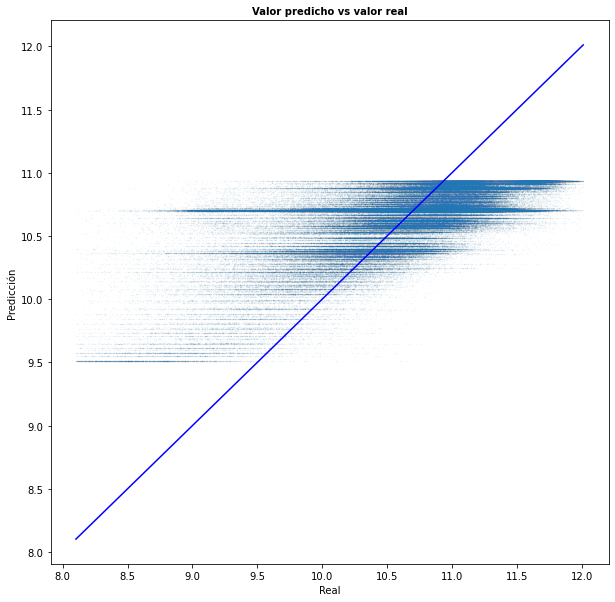

In [33]:
# Valor Real vs Predicciones
plt.figure(figsize=(10,10))
x = y_test
y = predicciones
plt.scatter(x, y, alpha=0.1, marker='.', s=0.2)
plt.plot([x.min(),x.max()], [x.min(),x.max()], color='b')
#plt.plot(x,x, color='r')
#plt.plot(x,x + rms, ls='--', color='y')
#plt.plot([7,x.max()], [7,x.max()], color='g')
#plt.plot(x, x- rms, ls='--', color='y')
#plt.plot([x.min(), x.max()], [x.min(), x.max()],
#                'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')


Text(0, 0.5, 'Valores de masa')

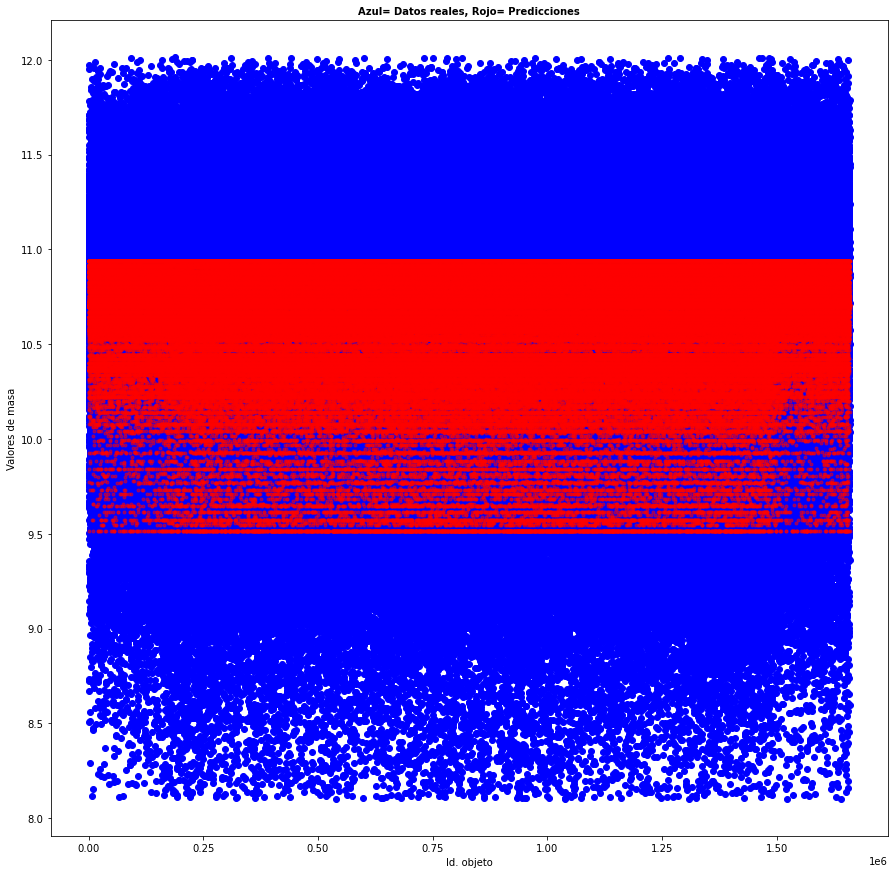

In [34]:
# Error por objeto
plt.figure(figsize=(15,15))
x = np.array(y_test.index)
y = np.array(y_test.values)
plt.scatter(x, y, color='b')
plt.scatter(x, predicciones, alpha=0.5, marker='.', color='r')
plt.title('Azul= Datos reales, Rojo= Predicciones', fontsize = 10, fontweight = "bold")
plt.xlabel('Id. objeto')
plt.ylabel('Valores de masa')

In [35]:
# Error de Predicciones
plt.figure(figsize=(15,8))
x = np.array(y_test.index)
y = np.array(y_test.values)
plt.scatter(x, y-predicciones, color='r')
plt.plot(x,y-y,'k--', color = 'black', lw=2)
plt.title('Error de predicción por objeto', fontsize = 10, fontweight = "bold")
plt.xlabel('Id. objeto')
plt.ylabel('Error')

MemoryError: Unable to allocate 1.25 TiB for an array with shape (414591, 414591) and data type float64

<Figure size 1080x576 with 0 Axes>

# **Hasta este punto, se ha testeado el modelo para predecir el valor de Masa. El error (rmse) de test es: 0.28537211738368756**

 ## **Búsqueda de Hiperparámetros con Grid Search**

In [37]:

param_grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }


grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(
                        n_estimators        = 1000, 
                        random_state        = 123,
                        # Activación de la parada temprana
                        validation_fraction = 0.1,
                        n_iter_no_change    = 5,
                        tol                 = 0.0001
                    ),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 10,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
# Mejores hiperparámetros 
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'auto', 'subsample': 1} : -0.07787173719230965 neg_root_mean_squared_error


In [ ]:
#early stopping para evitar el sobreajuste
# ==============================================================================
print(f"Número de árboles del modelo: {grid.best_estimator_.n_estimators_}")

Número de árboles del modelo: 85


In [ ]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.0922236668039649


**Con la implementación del modelo ajustand los hiperparámetros el valor de error (rmse) de test es ahora 0.0922236668039649**

Text(0, 0.5, 'Valores de masa')

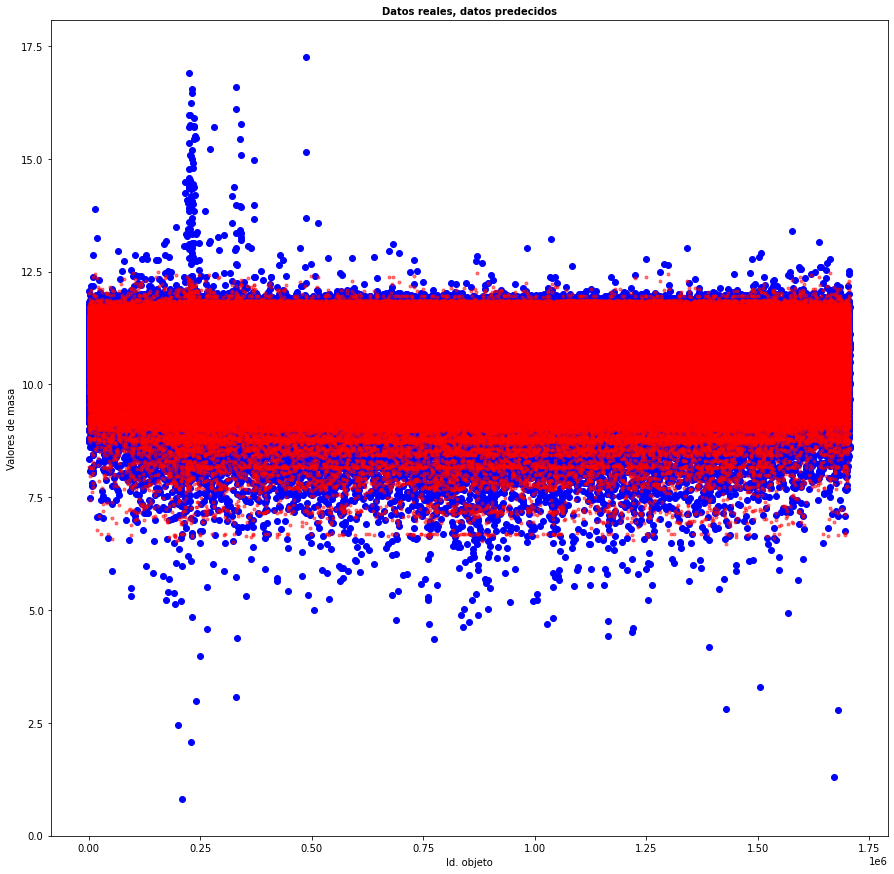

In [ ]:
# Error por objeto
plt.figure(figsize=(15,15))
x = np.array(y_test.index)
y = np.array(y_test.values)
plt.scatter(x, y, color='b')
plt.scatter(x, predicciones, alpha=0.5, marker='.', color='r')
plt.title('Datos reales, datos predecidos', fontsize = 10, fontweight = "bold")
plt.xlabel('Id. objeto')
plt.ylabel('Valores de masa')

**En el gráfico de arriba se puede ver que las predicciones (rojas) se acercan más a los valores reales (azules) que en la misma gráfica pero implementando el modelo sin la búsqueda de los mejores hiperparámetros**

Text(0, 0.5, 'Error')

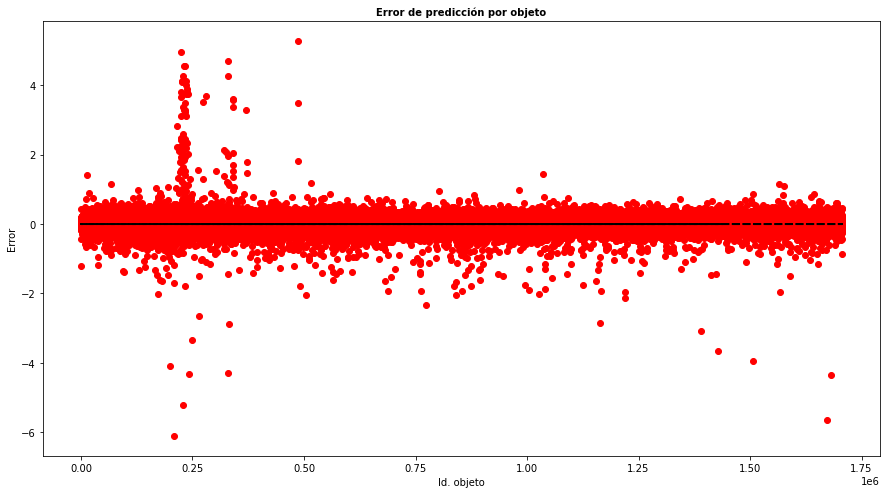

In [ ]:
# Error de Predicciones
plt.figure(figsize=(15,8))
x = np.array(y_test.index)
y = np.array(y_test.values)
plt.scatter(x, y-predicciones, color='r')
plt.plot(x,y-y,'k--', color = 'black', lw=2)
plt.title('Error de predicción por objeto', fontsize = 10, fontweight = "bold")
plt.xlabel('Id. objeto')
plt.ylabel('Error')

**Calculando la importancia de las variables **

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "Chabrier_MILES_total_mass").columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
14,Chabrier_MILES_total_mass_low_1sig,0.483633
13,Chabrier_MILES_total_mass_up_1sig,0.464784
10,Chabrier_MILES_age_lightW,0.044259
12,Chabrier_MILES_age_lightW_low_1sig,0.003273
11,Chabrier_MILES_age_lightW_up_1sig,0.001630
15,Z_NOQSO,0.001100
30,r-w1_err,0.000288
19,w1sigmag,0.000113
8,modelMagErr_i,0.000097
24,i-z,0.000087
